# Smart Phone Analysis


# Importing Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer as si
import warnings
from scipy import stats 
from scipy.stats import norm, expon,gamma,poisson

# Reading CSV File

In [2]:
data=pd.read_csv("smartphones.csv")
df=pd.DataFrame(data)
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


# Data Describe

**column 1**:- brand_name: The brand name of the smart phone

**column 2**:- model: The model of the smart phone

**column 3**:- price: The price of the smart phone

**column 4**:- avg_rating: The average rating given by the users

**column 5**:- 5G_or_not: Whether the smart phone is 5G or not

**column 6**:- processor_brand: The brand name of the processor

**column 7**:- num_cores: The number of cores present in the smart phone

**column 8**:- processor_speed: The speed of the processor

**column 9**:- battery_capacity: The battery capacity of the smart phone

**column 10**:- fast_charging_available: whether the fast charging is available in the smart phone or not

**column 11**:- internal_memory: Internal memeory capacity of the smart phone

**column 12**:- screen_size: The size of the smart phone screen

**column 13**:- refresh_rate: The refresh rate of the smart phone

**column 14**:- num_rear_cameras: Number of rear cameras present in the smart phones

**column 15**:- os: Name of the operating system used

**column 16**:- primary_camera_rear: The quality of main camera 

**column 17**:- primary_camera_front: The quality of main front camera

**column 18**:- extended_memory_available: Extended memory capacity of the smart phone

**column 19**:- resolution_height: The height of the smart phone

**column 20**:- resolution_width: The width of the smart phone

In [3]:
# Generate summary statistics for numerical columns
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [4]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [5]:
df.tail()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.3,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.3,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.3,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.2,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080
979,zte,ZTE Axon 40 Ultra 5G,61990,8.9,1,snapdragon,8.0,3.0,5000.0,1,...,128,6.80,120,3,android,64.0,16.0,0,2480,1116


In [6]:
# Display basic information about the DataFrame , including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [7]:
df.shape

(980, 22)

In [8]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [11]:
df.size

21560

In [14]:
impute= si(missing_values =np.nan,strategy='most_frequent')
impute.fit(df)
df.iloc[:,:]=impute.fit_transform(df.iloc[:,:])

In [15]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

In [16]:
# Count the number of unique values in each column 
df.nunique()

brand_name                    46
model                        980
price                        379
avg_rating                    30
5G_or_not                      2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
num_rear_cameras               4
os                             3
primary_camera_rear           18
primary_camera_front          19
extended_memory_available      2
resolution_height             65
resolution_width              40
dtype: int64

In [17]:
df['brand_name'].unique()

array(['apple', 'asus', 'blackview', 'blu', 'cat', 'cola', 'doogee',
       'duoqin', 'gionee', 'google', 'honor', 'huawei', 'ikall',
       'infinix', 'iqoo', 'itel', 'jio', 'lava', 'leeco', 'leitz',
       'lenovo', 'letv', 'lg', 'lyf', 'micromax', 'motorola', 'nokia',
       'nothing', 'nubia', 'oneplus', 'oppo', 'oukitel', 'poco', 'realme',
       'redmi', 'royole', 'samsung', 'sharp', 'sony', 'tcl', 'tecno',
       'tesla', 'vertu', 'vivo', 'xiaomi', 'zte'], dtype=object)

In [18]:
df['model'].unique()

array(['Apple iPhone 11', 'Apple iPhone 11 (128GB)',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
       'Apple iPhone 12 (128GB)', 'Apple iPhone 12 (256GB)',
       'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)',
       'Apple iPhone 12 Mini (256GB)', 'Apple iPhone 12 Pro (256GB)',
       'Apple iPhone 12 Pro (512GB)', 'Apple iPhone 13',
       'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
       'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
       'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
       'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
       'Apple iPhone 14 Mini', 'Apple iPhone 14 Plus',
       'Apple iPhone 14 Plus (256GB)', 'Apple iPhone 14 Plus (512GB)',
       'Apple iPhone 14 Pro', 'Apple iPhone 14 Pro (1TB)',
       'Apple iPhone 14 Pro (256GB)', 'Apple iPhone 14 Pro Max',
       'Apple iPhone 1

In [19]:
df['processor_brand'].unique()

array(['bionic', 'fusion', 'snapdragon', 'dimensity', 'helio', 'tiger',
       'google', 'kirin', 'spreadtrum', 'unisoc', 'sc9863a', 'mediatek',
       'exynos'], dtype=object)

In [20]:
df['ram_capacity'].unique()

array([ 4,  6,  8,  3, 12, 16, 18,  2,  1], dtype=int64)

In [21]:
df['internal_memory'].unique()

array([  64,  128,  256,  512, 1024,   32,   16,    8], dtype=int64)

In [22]:
df['os'].unique()

array(['ios', 'android', 'other'], dtype=object)

In [23]:
df['extended_memory_available'].unique()

array([0, 1], dtype=int64)

In [24]:
for column in df.columns:
    print(column,':',df[column].nunique())

brand_name : 46
model : 980
price : 379
avg_rating : 30
5G_or_not : 2
processor_brand : 13
num_cores : 3
processor_speed : 35
battery_capacity : 89
fast_charging_available : 2
fast_charging : 32
ram_capacity : 9
internal_memory : 8
screen_size : 79
refresh_rate : 6
num_rear_cameras : 4
os : 3
primary_camera_rear : 18
primary_camera_front : 19
extended_memory_available : 2
resolution_height : 65
resolution_width : 40


# Outliner analysis

# IQR Method

In [30]:
# Define a function to find outliers in a dataset using the IQR method
def find_outliers_iqr(data=df):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean mask indicating which data points are outliers
    return (data < lower_bound) | (data > upper_bound)
outliers = df[['resolution_height']].apply(find_outliers_iqr)

# Display rows containing potential outliers
potential_outliers = df[outliers.any(axis=1)]
print("Rows with Potential Outliers:")
potential_outliers

Rows with Potential Outliers:


,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
688,sony,Sony Xperia 1 II,69999,8.9,1,snapdragon,8.0,2.84,4000.0,1,...,256,6.5,60,4,android,12.0,8.0,1,3840,1644
689,sony,Sony Xperia 1 IV (12GB RAM + 512GB),92980,8.4,1,snapdragon,8.0,3.00,5000.0,1,...,512,6.5,120,4,android,12.0,12.0,1,3840,1644
696,sony,Sony Xperia Pro-I,134999,8.4,1,snapdragon,8.0,2.84,4500.0,1,...,512,6.5,120,3,android,12.0,8.0,1,3840,1644


# Box Plot

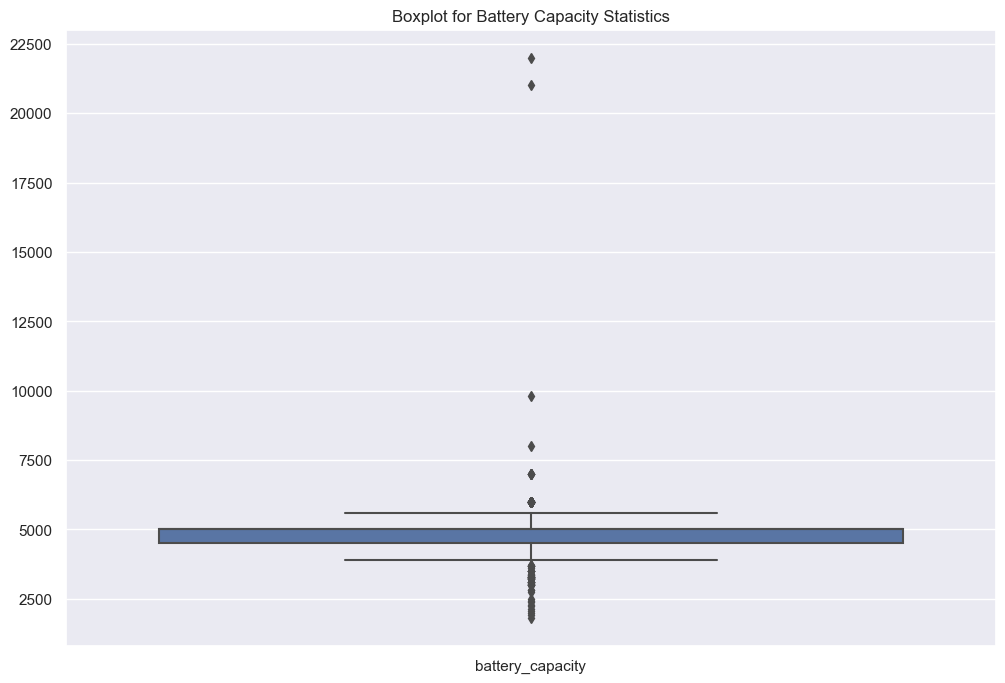

In [66]:
# Select relevant columns for the boxplot
selected_columns = [ 'battery_capacity']
subset_df = df[selected_columns]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset_df)
plt.title('Boxplot for Battery Capacity Statistics')
plt.show()

# Data Visualisation

# Univariante analysis

# Histogram

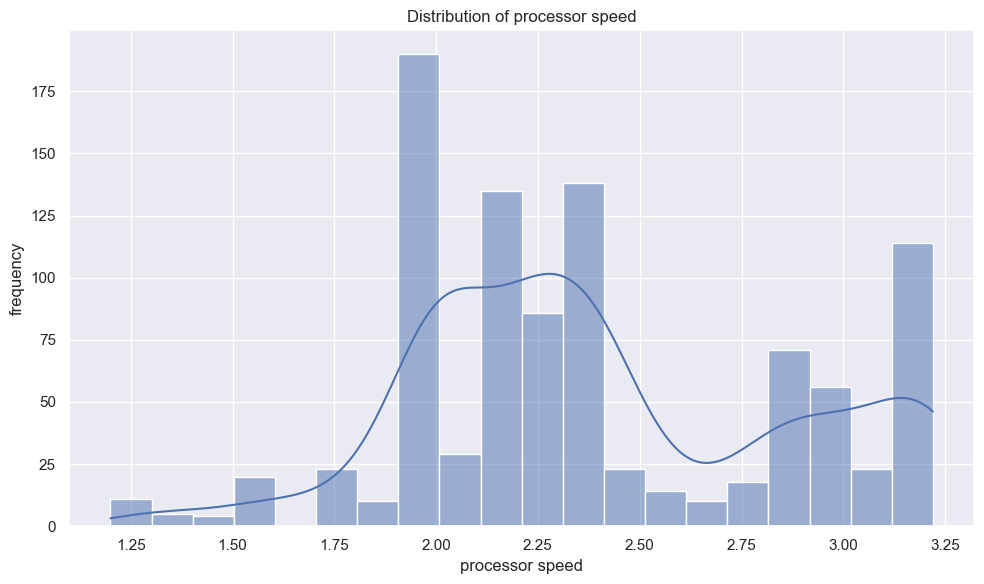

In [80]:
#histogram with a kernel density estimate (KDE) to illustrate the distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(df['processor_speed'], bins=20, kde=True)
plt.xlabel('processor speed')
plt.ylabel('frequency')
plt.title('Distribution of processor speed')
plt.tight_layout()
plt.show()

# Distribution Plot

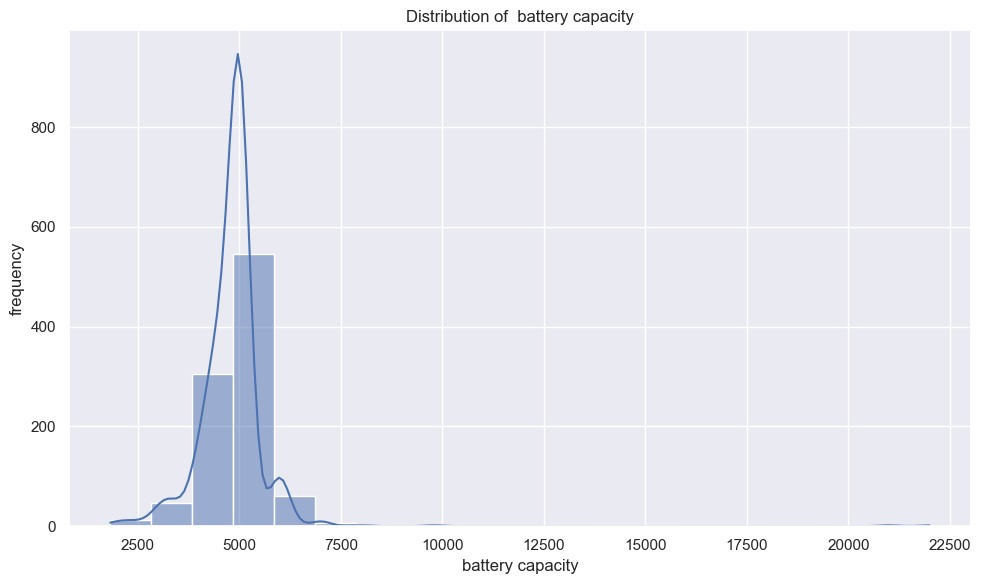

In [81]:
# Creating a distribution plotof gross(M) using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='battery_capacity', bins=20, kde=True)
plt.xlabel('battery capacity')
plt.ylabel('frequency')
plt.title('Distribution of  battery capacity')
plt.tight_layout()
plt.show()

# Count plot

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


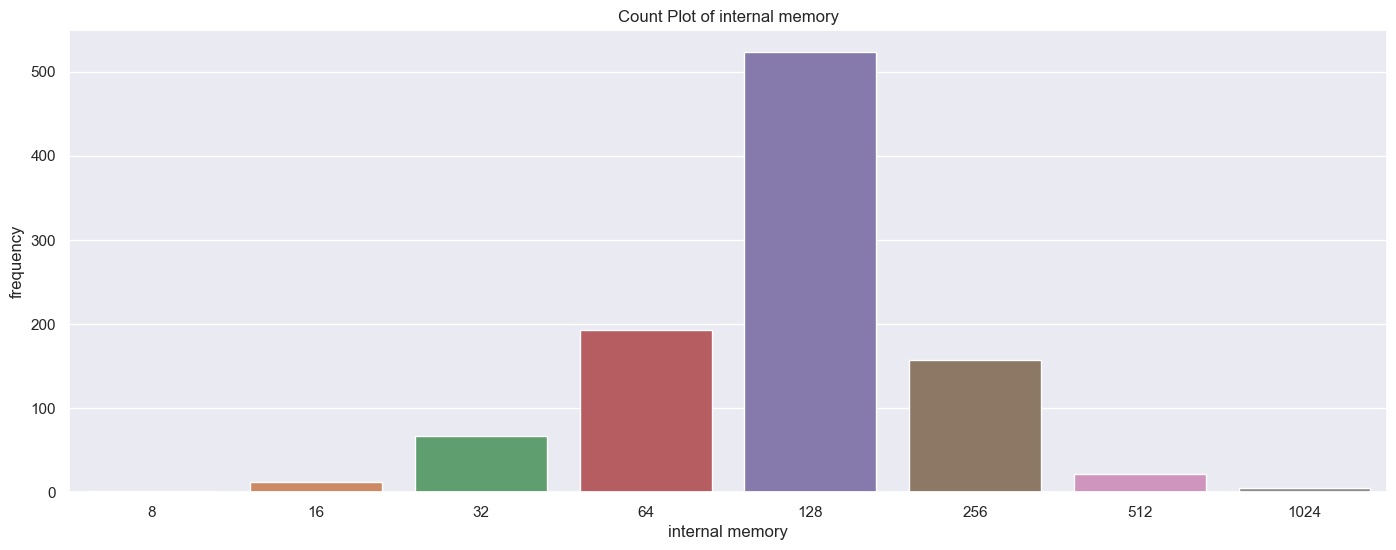

In [85]:
sns.countplot(df['internal_memory'])
plt.title('Count Plot of internal memory')
plt.xlabel('internal memory')
plt.ylabel('frequency')
plt.show()

# Bivariante Analysis

# Bar Plot

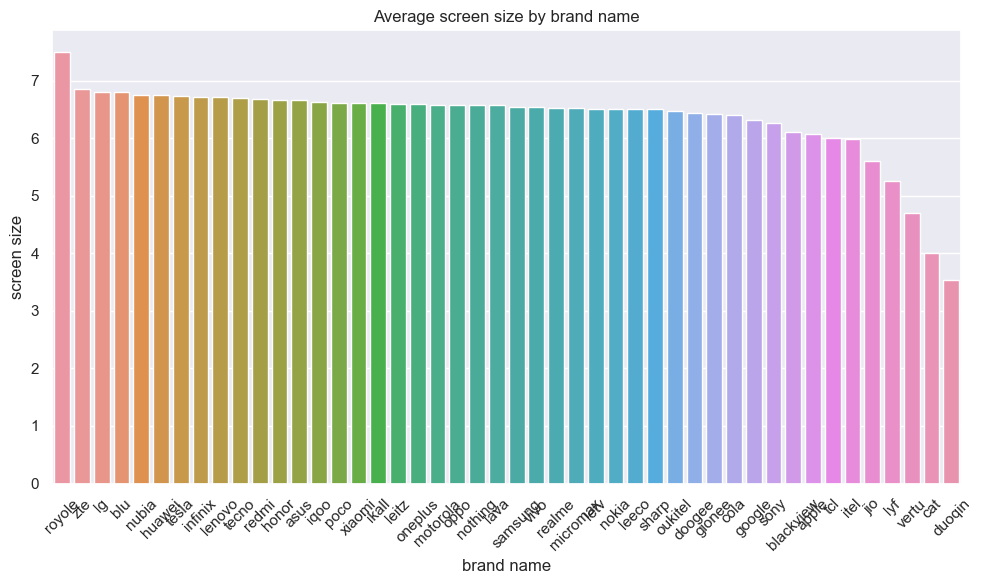

In [88]:

# Bar plot of average gross revenue by genre
avg_gross_by_genre = df.groupby('brand_name')['screen_size'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_by_genre.index, y=avg_gross_by_genre.values)
plt.xticks(rotation=45)
plt.xlabel('brand name')
plt.ylabel('screen size')
plt.title('Average screen size by brand name')
plt.tight_layout()
plt.show()


# PIE Chart

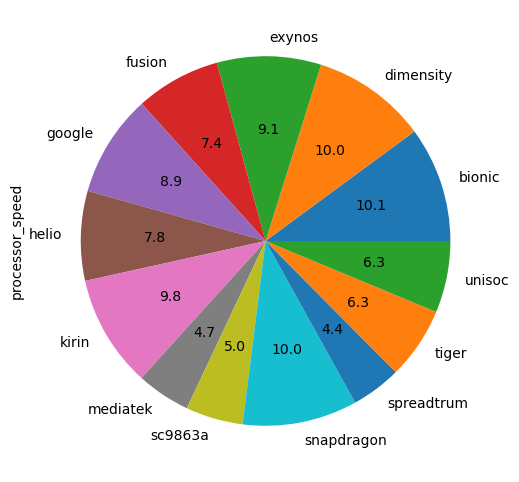

In [39]:
df.groupby('processor_brand').max()['processor_speed'].plot(kind='pie',figsize=(13,6),autopct="%0.1f")
plt.show()

# Scatter Plot

C:\Users\pavan\AppData\Local\Temp\ipykernel_5888\3375527440.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


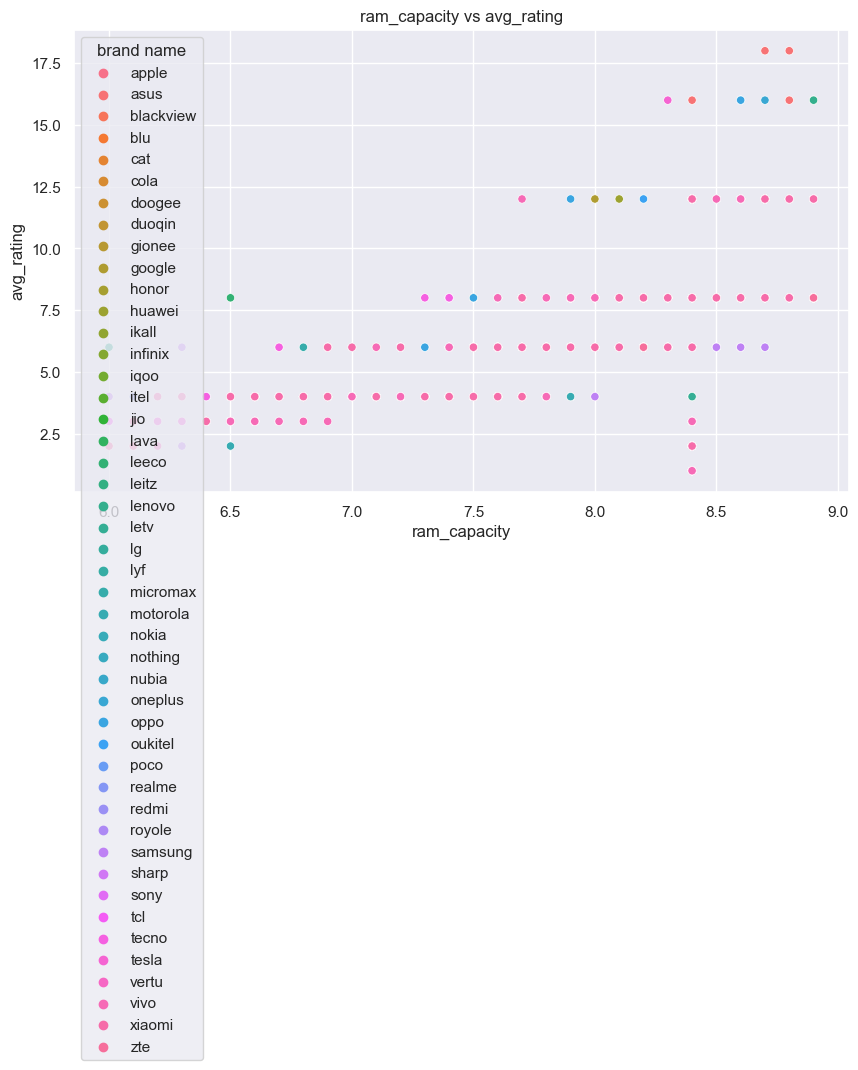

In [99]:
#scatterplot to explore the relationship between movie release years and gross revenues
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_rating', y='ram_capacity', data=df, hue='brand_name')
plt.xlabel('ram_capacity')
plt.ylabel('avg_rating')
plt.title('ram_capacity vs avg_rating')
plt.legend(title='brand name')
plt.tight_layout()
plt.show()

# Violin Plot

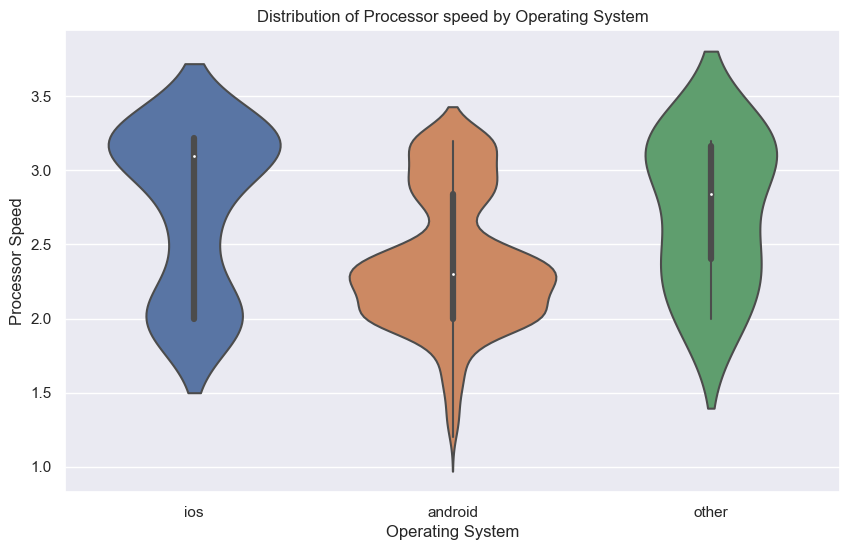

In [100]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='os', y='processor_speed', data=df)
plt.xlabel('Operating System')
plt.ylabel('Processor Speed')
plt.title('Distribution of Processor speed by Operating System')
plt.show()


# Multivariate Analysis

# Pair Plot

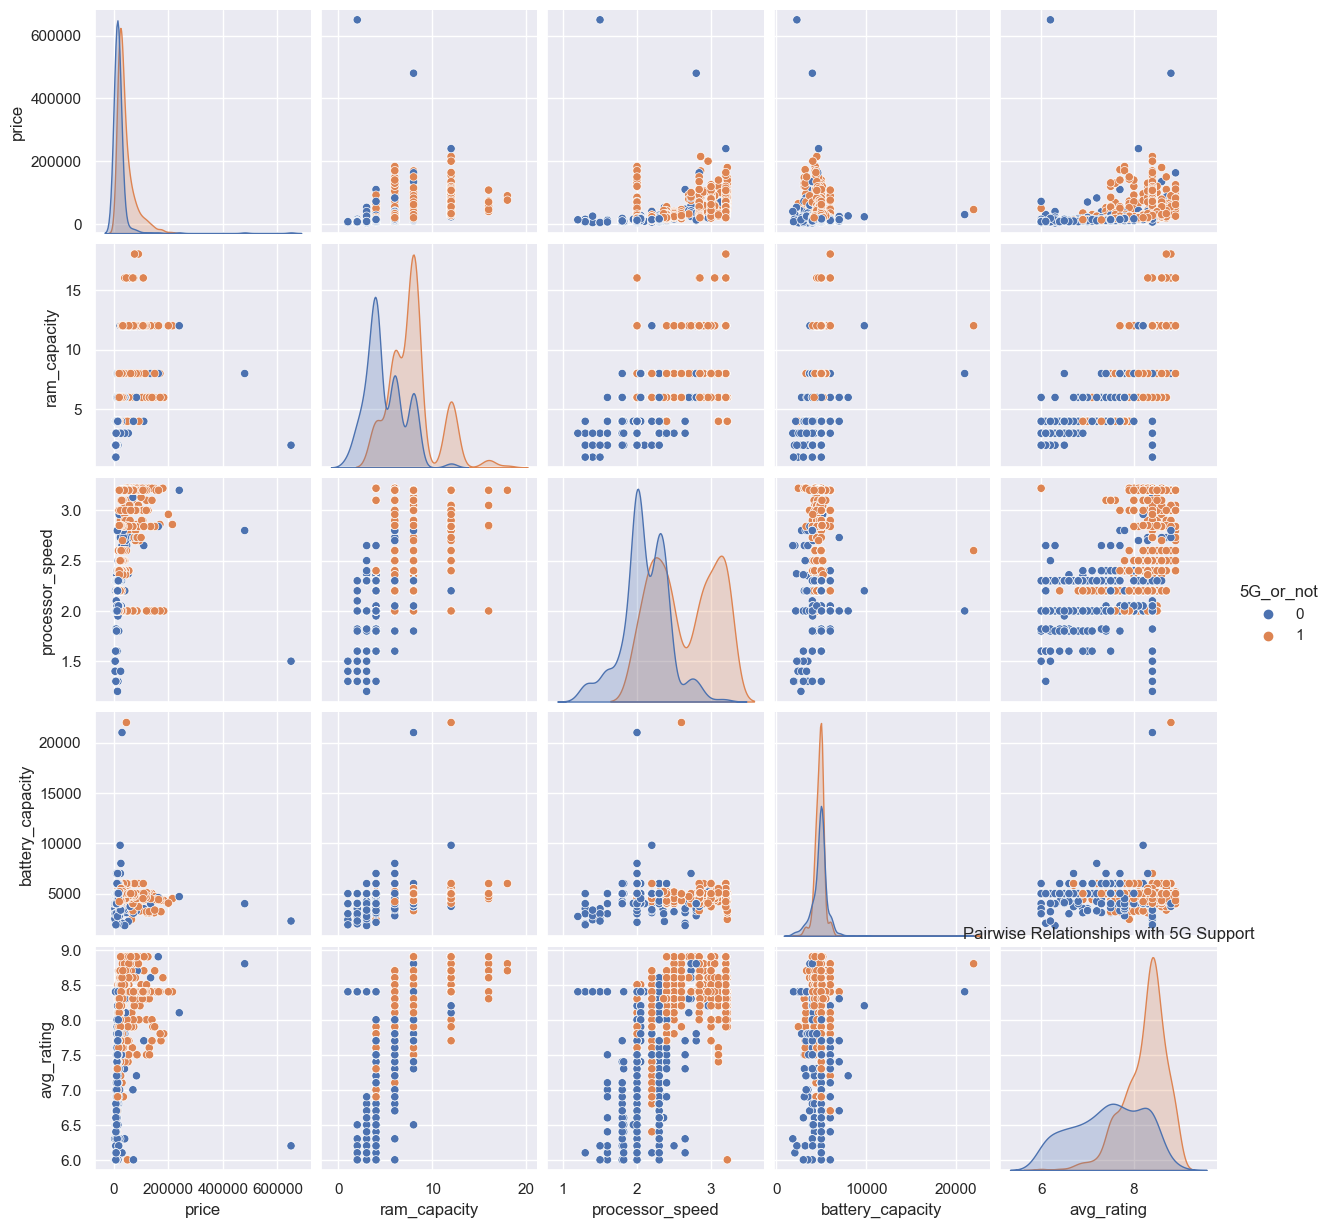

In [117]:
sns.pairplot(df[['price', 'ram_capacity', 'processor_speed', 'battery_capacity', 'avg_rating', '5G_or_not']], hue='5G_or_not')
plt.title('Pairwise Relationships with 5G Support')
plt.show()

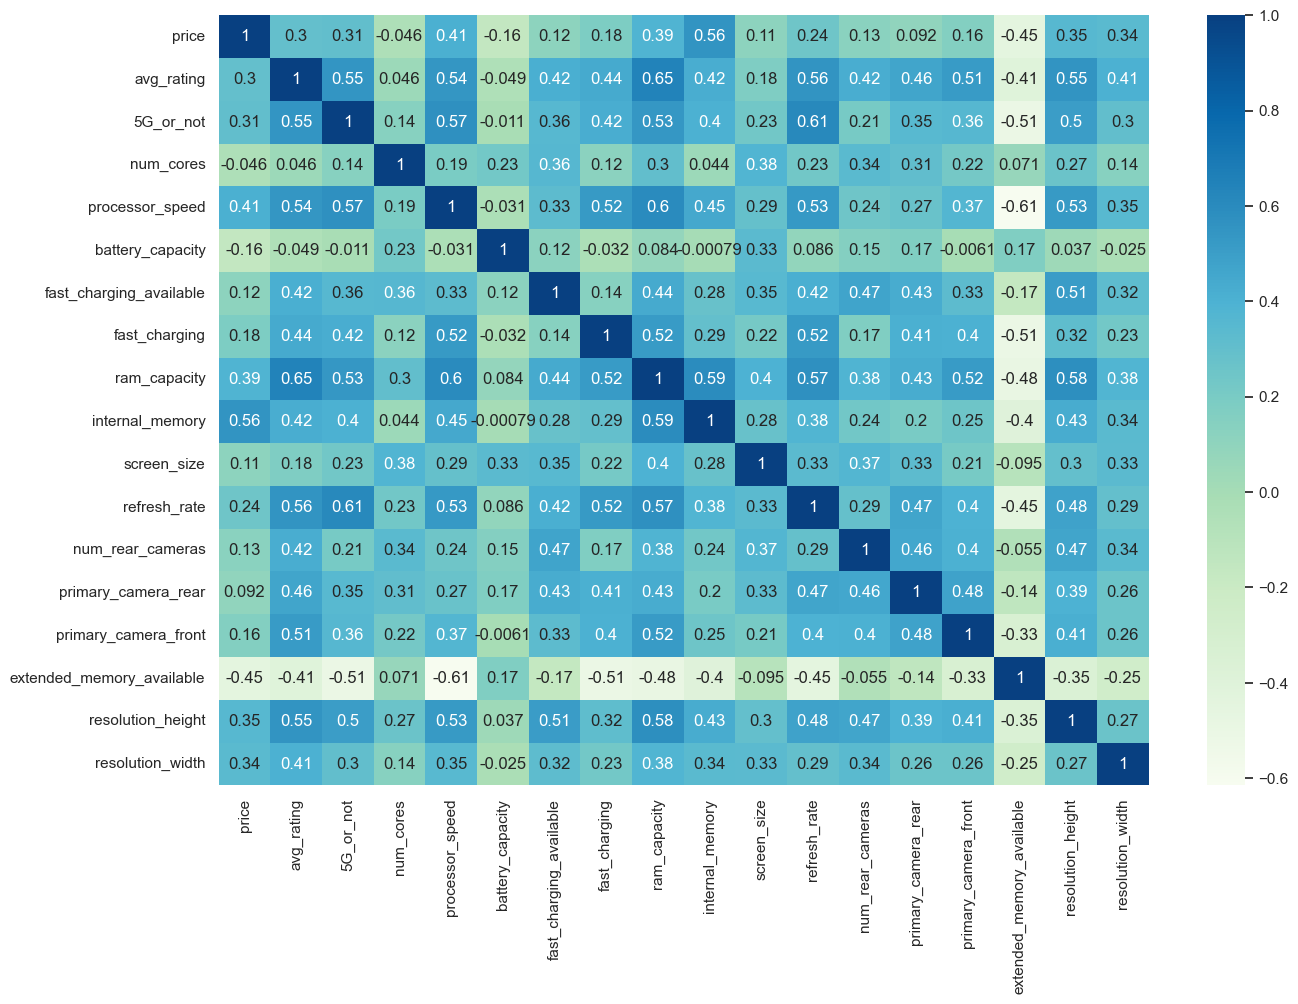

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='GnBu')
plt.show()

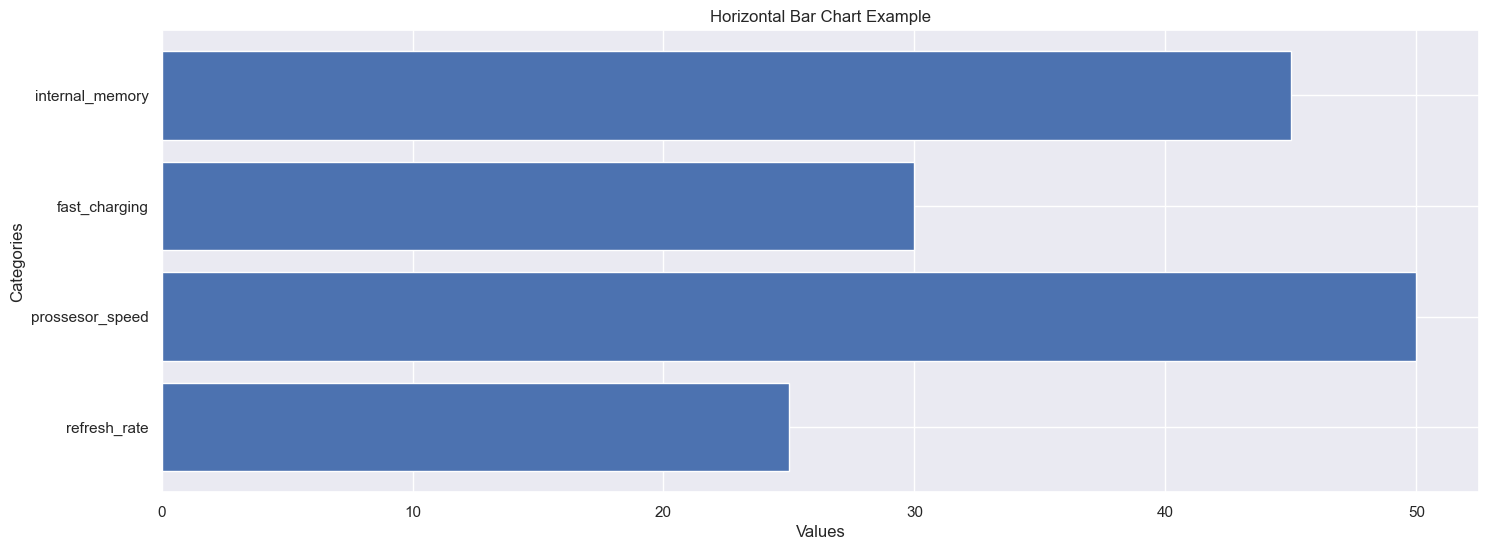

In [52]:
categories = ['refresh_rate', 'prossesor_speed', 'fast_charging','internal_memory']
values = [25, 50, 30, 45]

plt.barh(categories, values)


plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart Example')

plt.show()

# DISTRIBUTIONS

# Poisson Distribution 

C:\Users\pavan\AppData\Local\Temp\ipykernel_5888\4151929771.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x_poisson, p_poisson, 'r-', label='Poisson Distribution')


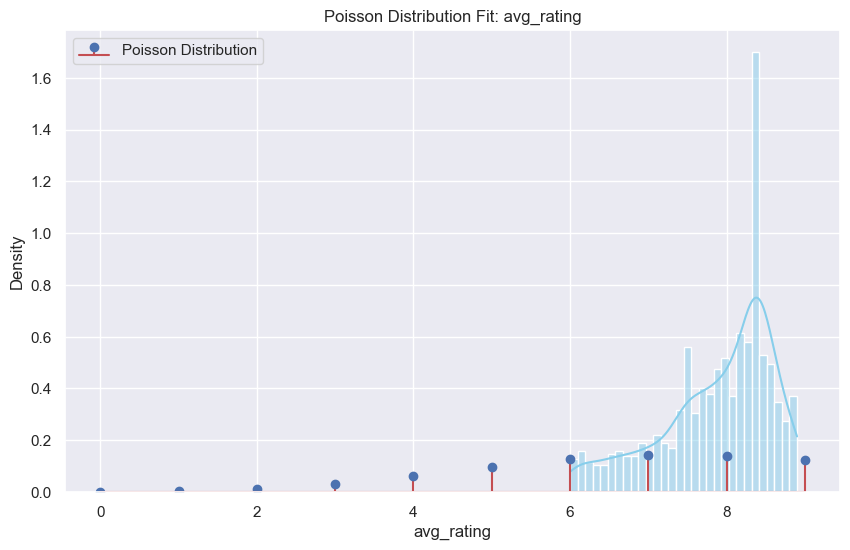

In [151]:
# Choose a column for the Poisson distribution (e.g., 'rating')
column_name = 'avg_rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Poisson distribution to the data
mu = df[column_name].mean()
x_poisson = np.arange(0, df[column_name].max() + 1)
p_poisson = poisson.pmf(x_poisson, mu)
plt.stem(x_poisson, p_poisson, 'r-', label='Poisson Distribution')

plt.title(f'Poisson Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

# Exponential Distribution of Average Rating

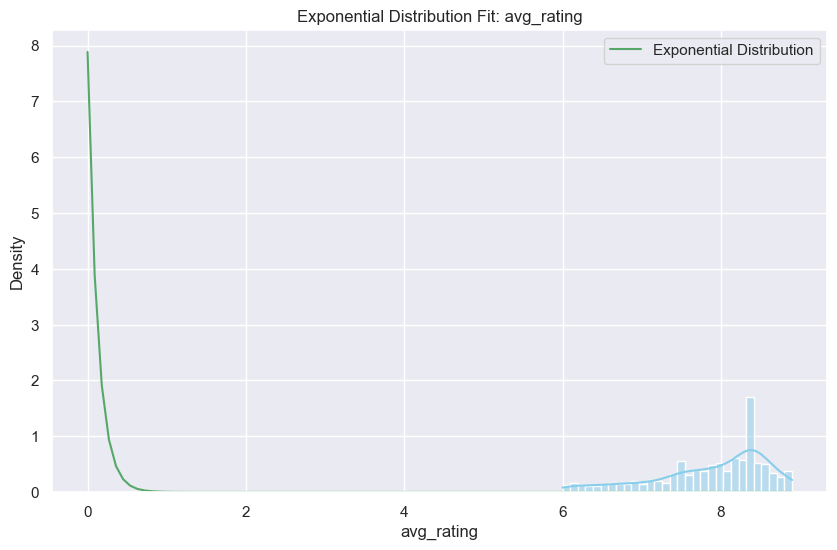

In [152]:
# Choose a column for the Exponential distribution (e.g., 'rating')
column_name = 'avg_rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit an Exponential distribution to the data
scale = 1 / df[column_name].mean()
x_exp = np.linspace(0, df[column_name].max(), 100)
p_exp = expon.pdf(x_exp, scale=scale)
plt.plot(x_exp, p_exp, 'g-', label='Exponential Distribution')

plt.title(f'Exponential Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

# Gamma Distribution of Average Rating

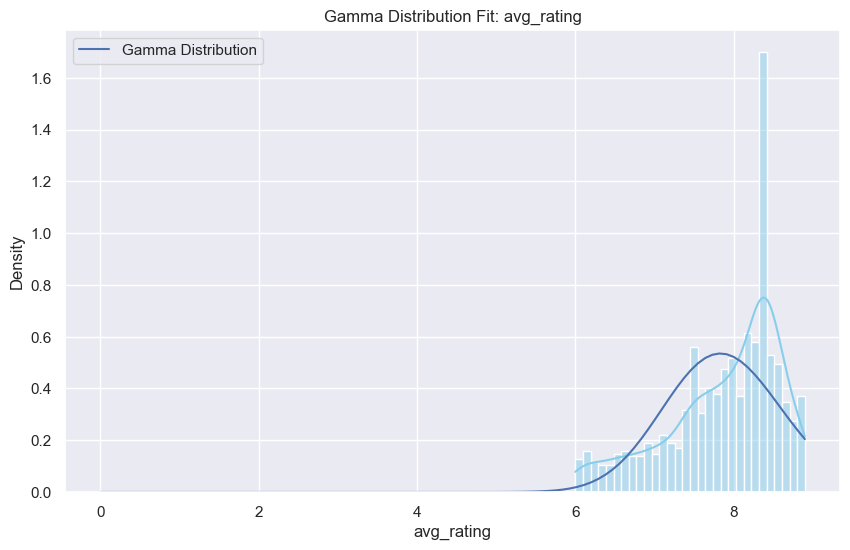

In [156]:
# Choose a column for the Gamma distribution (e.g., 'rating')
column_name = 'avg_rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Gamma distribution to the data
a, loc, scale = gamma.fit(df[column_name])
x_gamma = np.linspace(0, df[column_name].max(), 100)
p_gamma = gamma.pdf(x_gamma, a, loc, scale)
plt.plot(x_gamma, p_gamma, 'b-', label='Gamma Distribution')

plt.title(f'Gamma Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

# Normal Distribution of Average Rating

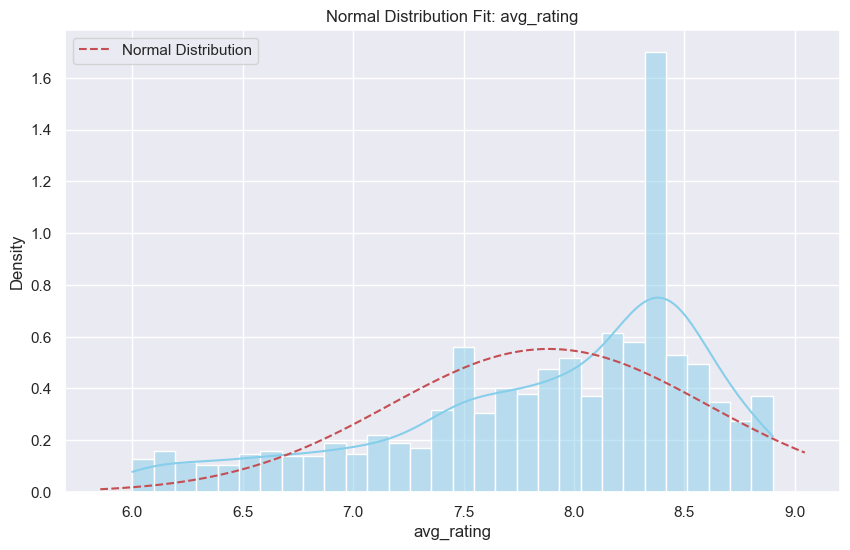

In [154]:
# Choose a column for the Normal distribution (e.g., 'rating')
column_name = 'avg_rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Normal distribution to the data
mean, std = norm.fit(df[column_name])
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mean, std)
plt.plot(x_norm, p_norm, 'r--', label='Normal Distribution')

plt.title(f'Normal Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()


# Combination of All Distributions of Average Rating

C:\Users\pavan\AppData\Local\Temp\ipykernel_5888\1738130790.py:31: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x_poisson, p_poisson, 'purple', label='Poisson Distribution')


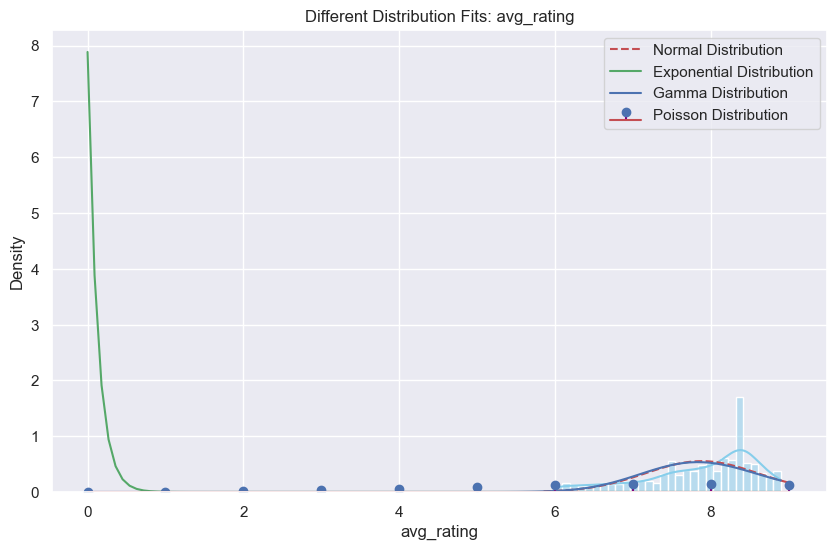

In [155]:
# Choose a column for the distribution fits (e.g., 'rating')
column_name = 'avg_rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Normal distribution to the data
mean, std = norm.fit(df[column_name])
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mean, std)
plt.plot(x_norm, p_norm, 'r--', label='Normal Distribution')

# Fit an Exponential distribution to the data
scale = 1 / df[column_name].mean()
x_exp = np.linspace(0, df[column_name].max(), 100)
p_exp = expon.pdf(x_exp, scale=scale)
plt.plot(x_exp, p_exp, 'g-', label='Exponential Distribution')

# Fit a Gamma distribution to the data
a, loc, scale = gamma.fit(df[column_name])
x_gamma = np.linspace(0, df[column_name].max(), 100)
p_gamma = gamma.pdf(x_gamma, a, loc, scale)
plt.plot(x_gamma, p_gamma, 'b-', label='Gamma Distribution')

# Fit a Poisson distribution to the data
mu = df[column_name].mean()
x_poisson = np.arange(0, df[column_name].max() + 1)
p_poisson = poisson.pmf(x_poisson, mu)
plt.stem(x_poisson, p_poisson, 'purple', label='Poisson Distribution')

plt.title(f'Different Distribution Fits: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

# Hypothesis Testing of Fast charging column

In [141]:
# Assuming you want to compare the processor speeds of phones with and without fast charging
processor_speed_fast_charging = df[df['fast_charging_available'] == 1]['processor_speed']
processor_speed_no_fast_charging = df[df['fast_charging_available'] == 0]['processor_speed']

# Perform a t-test for independent samples
t_statistic, p_value = ttest_ind(processor_speed_fast_charging, processor_speed_no_fast_charging, equal_var=False)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Set a significance level (e.g., 0.05) and check if the p-value is less than it
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average processor speed between phones with and without fast charging.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average processor speed between phones with and without fast charging.")


T-statistic: 10.512649684990533
P-value: 1.1808102192697218e-20
Reject the null hypothesis: There is a significant difference in average processor speed between phones with and without fast charging.


# 1. Can you visualize the brand-wise distribution of average smartphone prices using a bar chart?

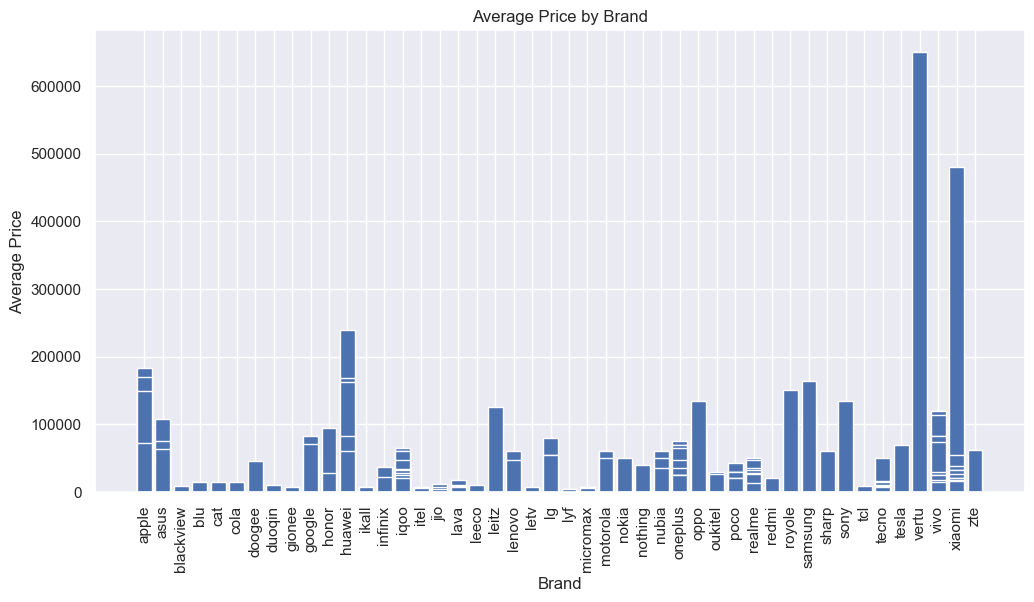

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['brand_name'], df['price'])
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.title('Average Price by Brand')
plt.show()

# 2. How does the number of rear cameras vary with different RAM capacity levels?

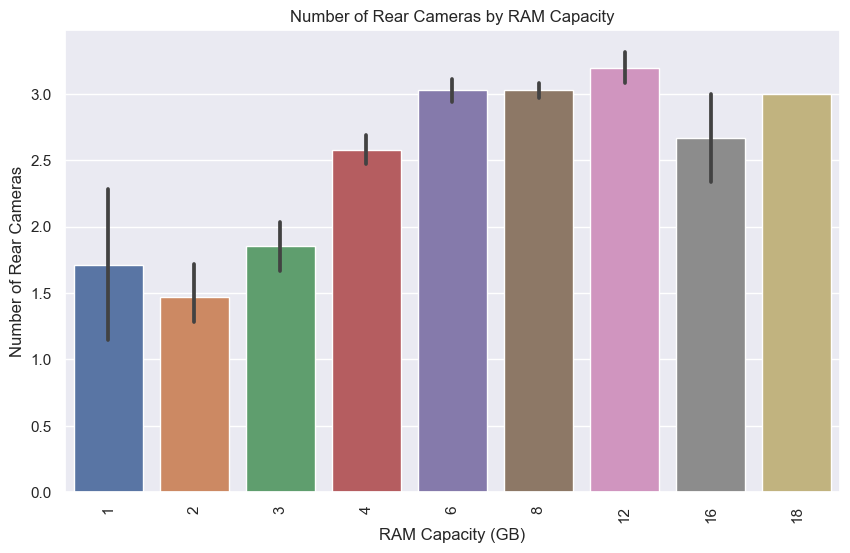

In [159]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ram_capacity', y='num_rear_cameras', data=df)
plt.xlabel('RAM Capacity (GB)')
plt.ylabel('Number of Rear Cameras')
plt.title('Number of Rear Cameras by RAM Capacity')
plt.xticks(rotation=90)
plt.show()

# 3. What is the correlation between various attributes in the smartphone dataset?

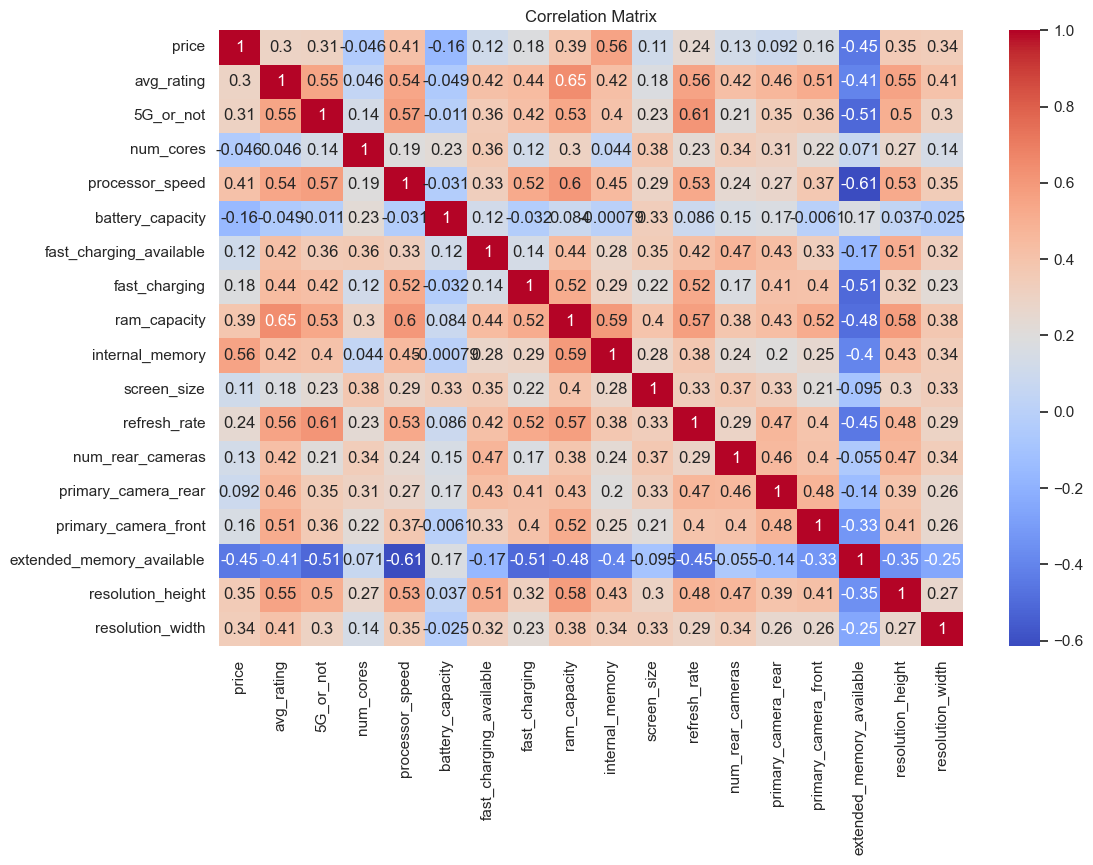

In [160]:
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame called 'df'
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. What is the distribution of smartphones with and without 5G support in the dataset?

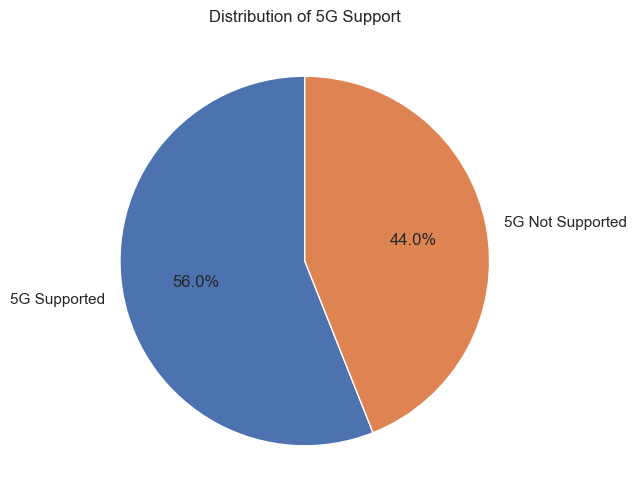

In [161]:
plt.figure(figsize=(6, 6))
labels = ['5G Supported', '5G Not Supported']
sizes = [df['5G_or_not'].sum(), len(df) - df['5G_or_not'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of 5G Support')
plt.show()

# 5. How does the RAM capacity vary among different smartphone brands?

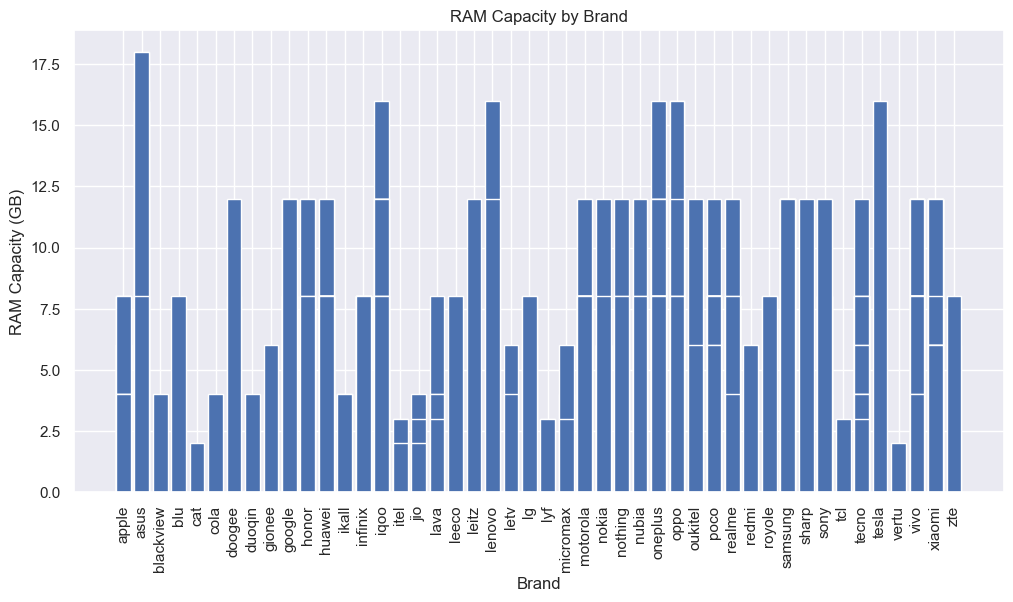

In [162]:
plt.figure(figsize=(12, 6))
plt.bar(df['brand_name'], df['ram_capacity'])
plt.xlabel('Brand')
plt.ylabel('RAM Capacity (GB)')
plt.xticks(rotation=90)
plt.title('RAM Capacity by Brand')
plt.show()

# 6. How is the price distribution different for various processor brands?

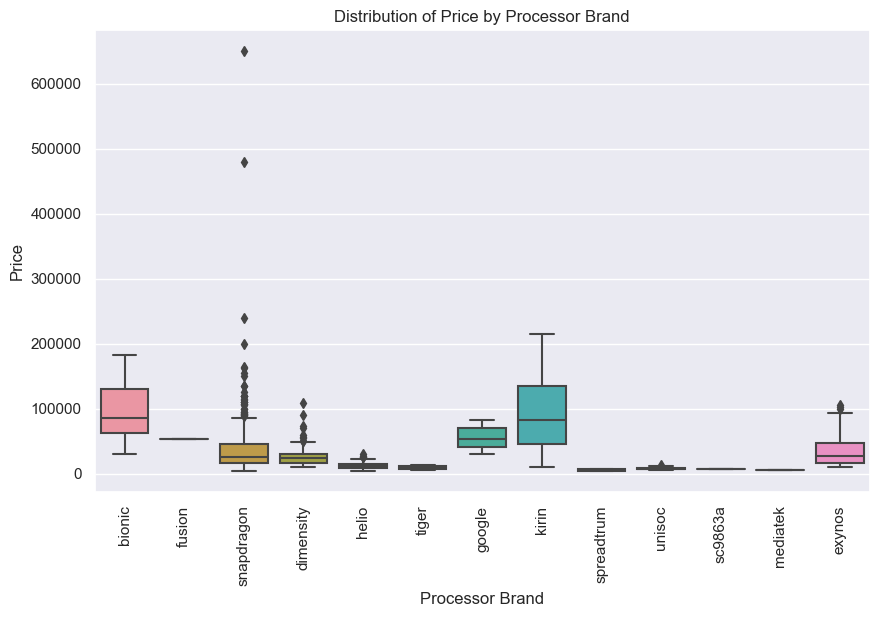

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='processor_brand', y='price', data=df)
plt.xlabel('Processor Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Distribution of Price by Processor Brand')
plt.show()

# 7. What is the distribution of different operating systems in the dataset?

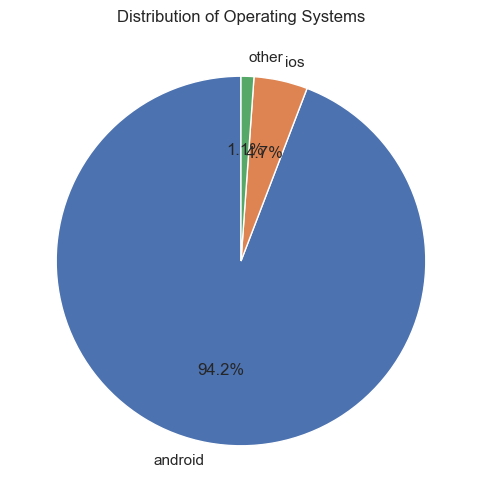

In [58]:
plt.figure(figsize=(6, 6))
os = df['os'].value_counts()
labels = os.index
sizes = os.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Operating Systems')
plt.show()

# 8. How does the number of rear cameras vary by smartphone brand?

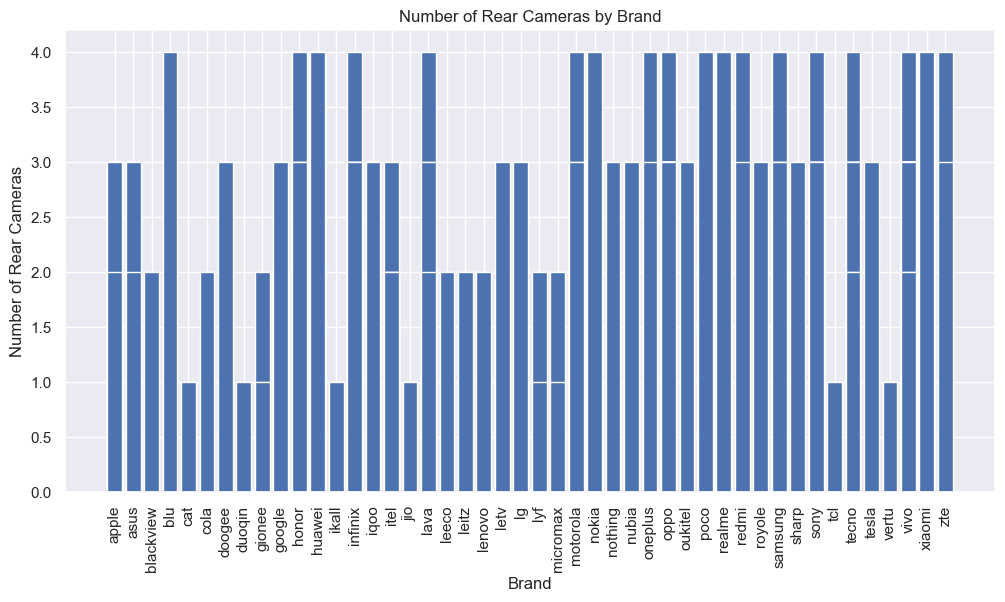

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(df['brand_name'], df['num_rear_cameras'])
plt.xlabel('Brand')
plt.ylabel('Number of Rear Cameras')
plt.xticks(rotation=90)
plt.title('Number of Rear Cameras by Brand')
plt.show()

# 9. What are the top 10 smartphone models with the highest battery capacity?

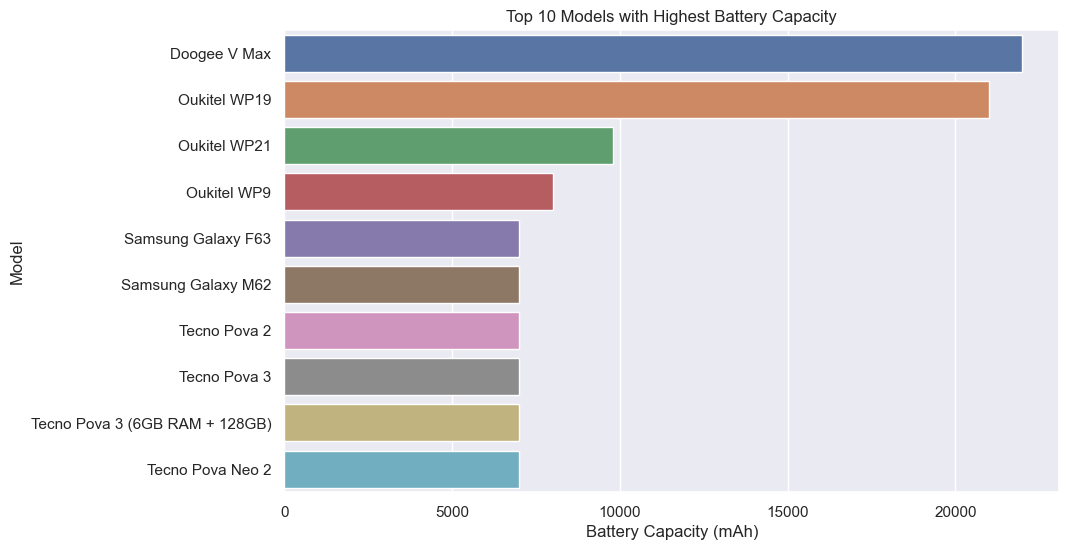

In [60]:
top_10_battery_capacity = df.nlargest(10, 'battery_capacity')
plt.figure(figsize=(10, 6))
sns.barplot(x='battery_capacity', y='model', data=top_10_battery_capacity)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Model')
plt.title('Top 10 Models with Highest Battery Capacity')
plt.show()

# 10. How does the screen size differ among various smartphone brands?

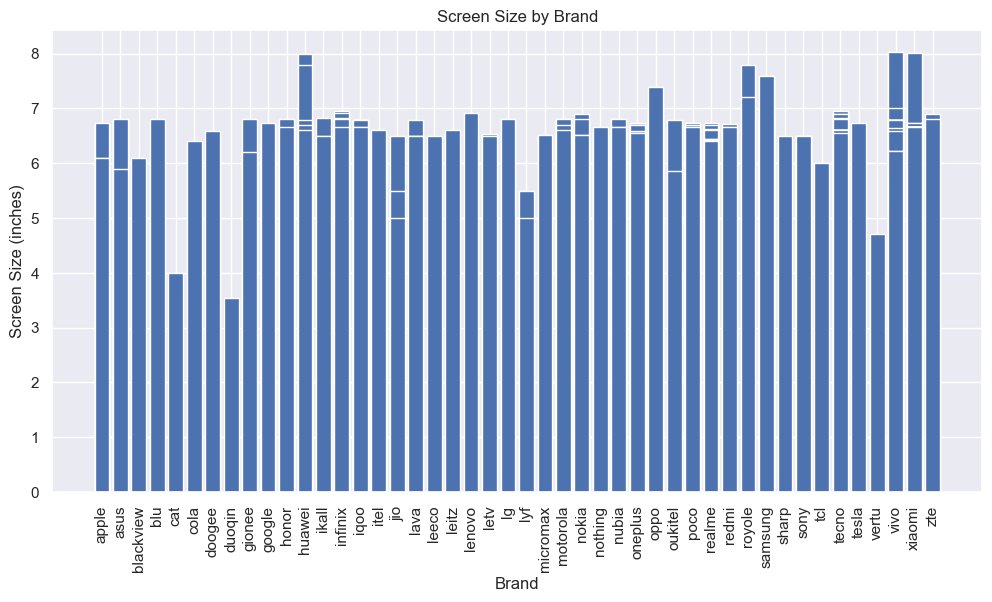

In [157]:
plt.figure(figsize=(12, 6))
plt.bar(df['brand_name'], df['screen_size'])
plt.xlabel('Brand')
plt.ylabel('Screen Size (inches)')
plt.xticks(rotation=90)
plt.title('Screen Size by Brand')
plt.show()

# 11. Is there a relationship between battery capacity and smartphone price?

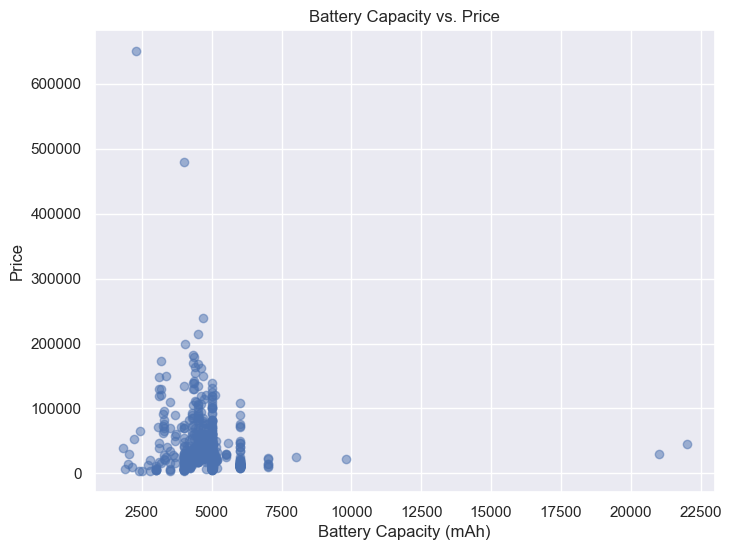

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(df['battery_capacity'], df['price'], alpha=0.5)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price')
plt.title('Battery Capacity vs. Price')
plt.show()

# 12. Can you explore pairwise relationships while considering 5G support as a hue category?

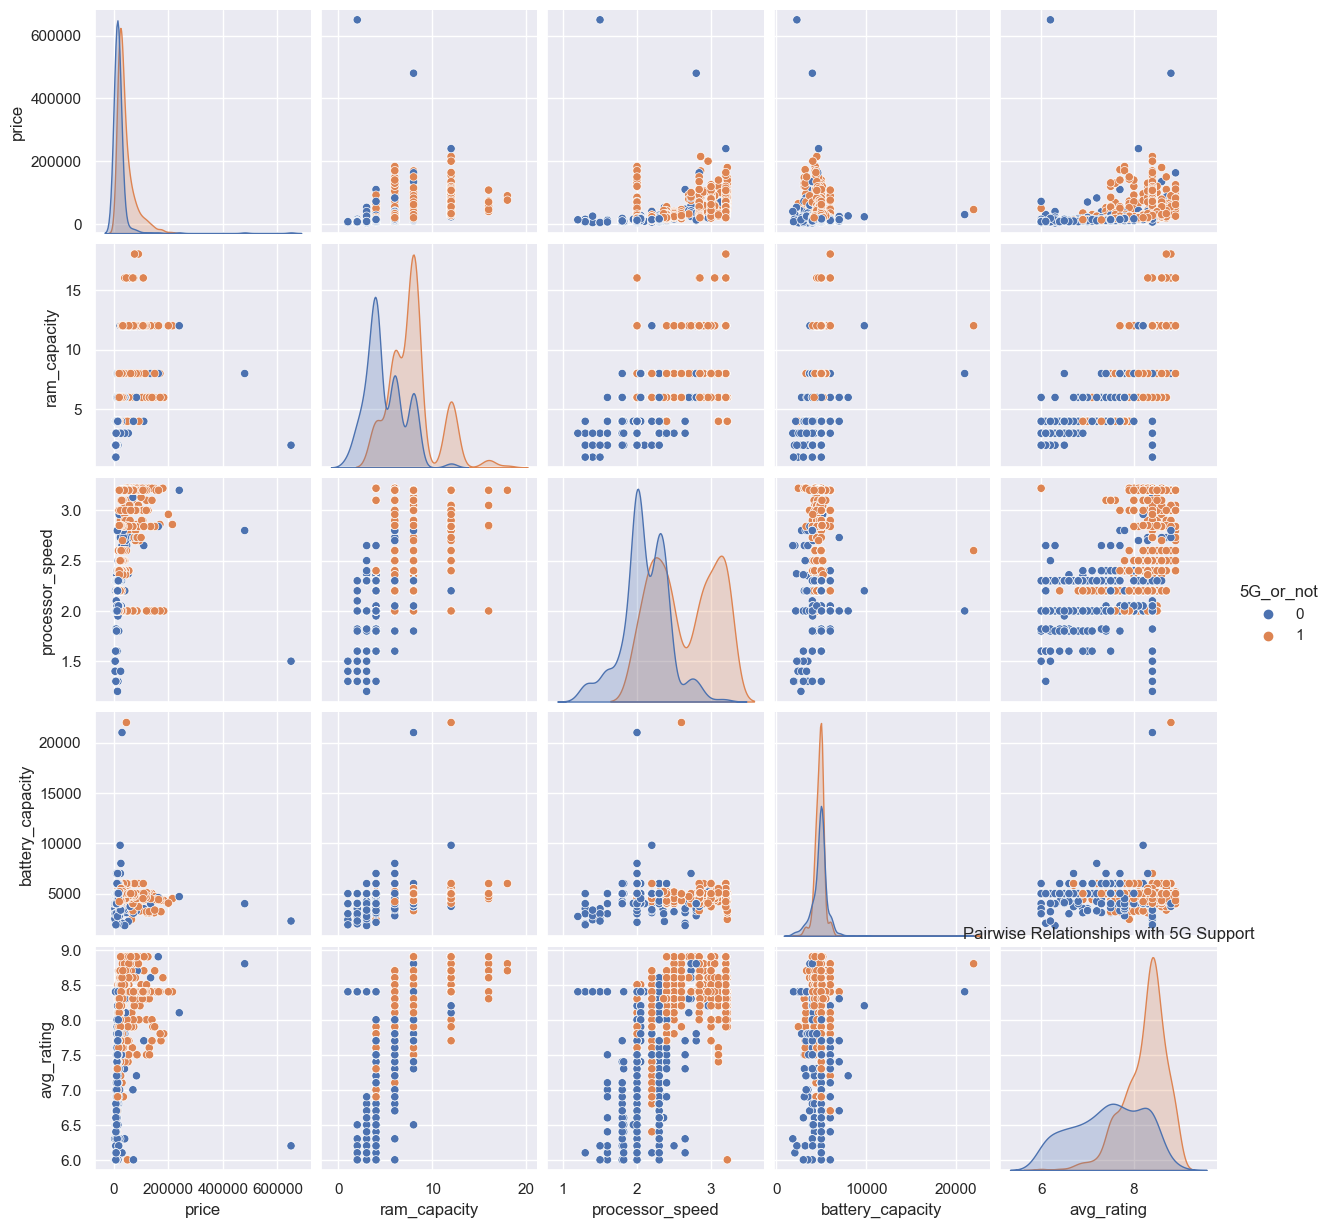

In [103]:
sns.pairplot(df[['price', 'ram_capacity', 'processor_speed', 'battery_capacity', 'avg_rating', '5G_or_not']], hue='5G_or_not')
plt.title('Pairwise Relationships with 5G Support')
plt.show()

# 13. What is the distribution of smartphones with and without fast charging support?

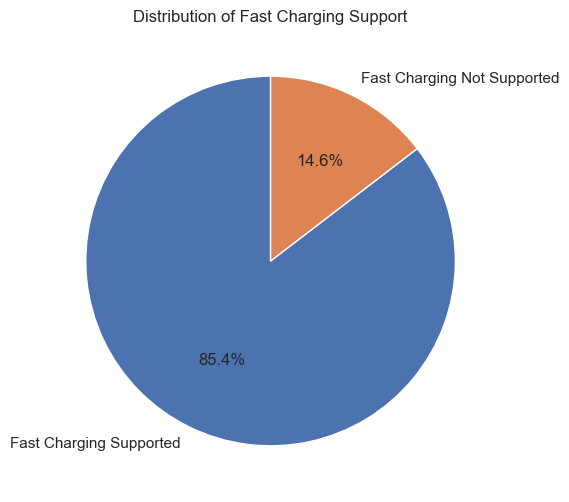

In [116]:
plt.figure(figsize=(6, 6))
labels = ['Fast Charging Supported', 'Fast Charging Not Supported']
sizes = [df['fast_charging_available'].sum(), len() - df['fast_charging_available'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fast Charging Support')
plt.show()

# 14. How does the number of processor cores vary by processor brand?

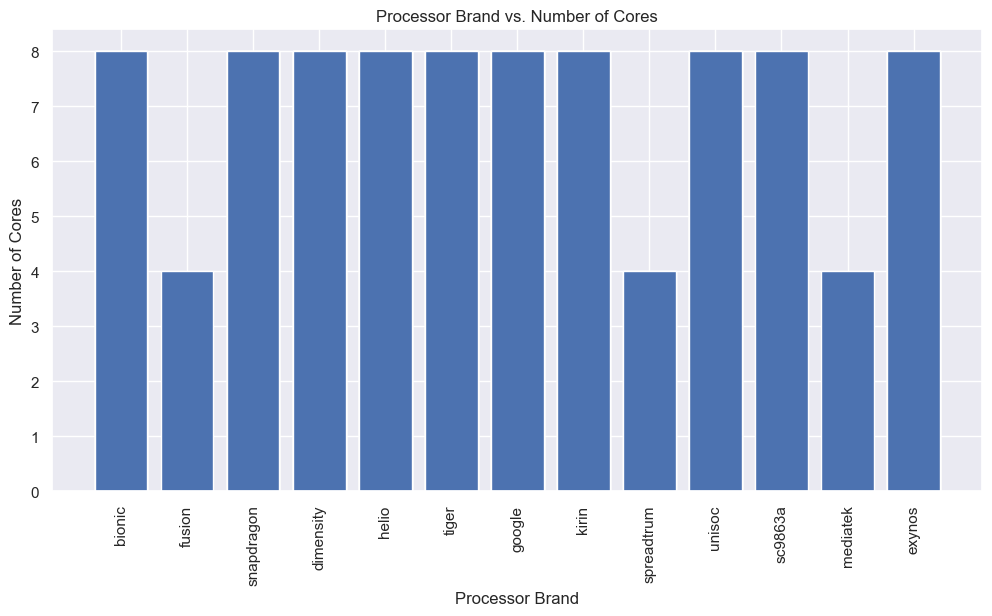

In [115]:
plt.figure(figsize=(12, 6))
plt.bar(df['processor_brand'], df['num_cores'])
plt.xlabel('Processor Brand')
plt.ylabel('Number of Cores')
plt.xticks(rotation=90)
plt.title('Processor Brand vs. Number of Cores')
plt.show()

# 15. What are the pairwise relationships between various numeric attributes in the dataset?

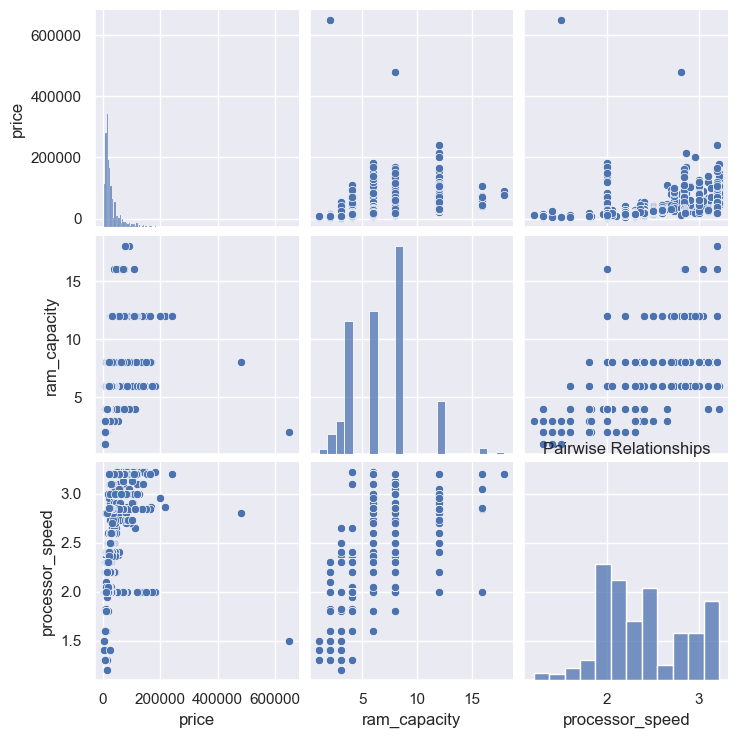

In [114]:
import seaborn as sns
sns.pairplot(df[['price', 'ram_capacity', 'processor_speed']])
plt.title('Pairwise Relationships')
plt.show()

# 16. How is the price distributed among different operating systems?

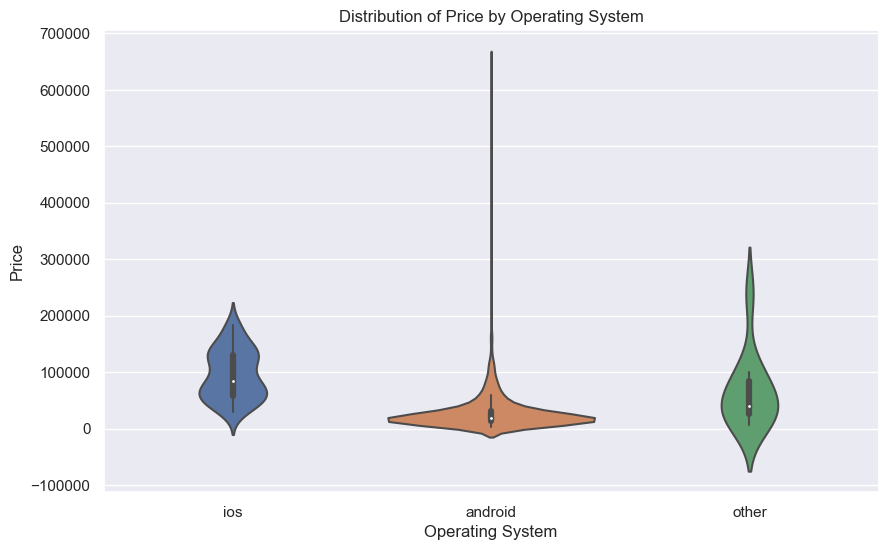

In [113]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='os', y='price', data=df)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Distribution of Price by Operating System')
plt.show()

# 17. What is the distribution of average ratings for smartphones in the dataset?

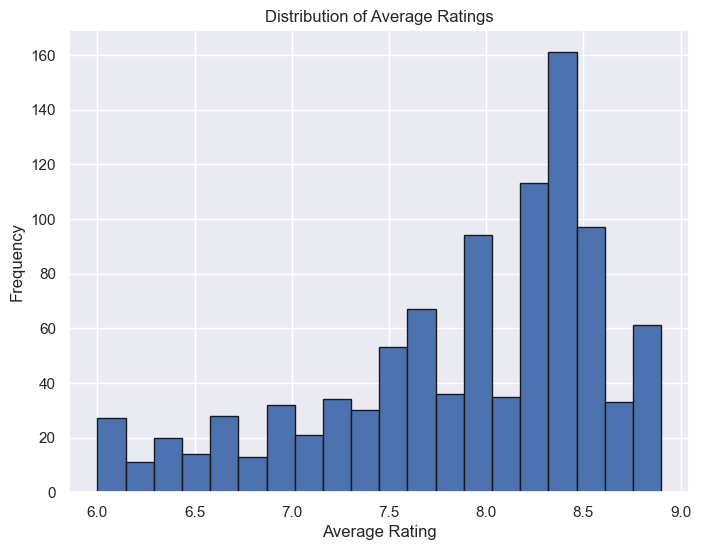

In [112]:
plt.figure(figsize=(8, 6))
plt.hist(df['avg_rating'], bins=20, edgecolor='k')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

# 18. Does the choice of operating system affect the number of rear cameras in smartphones?

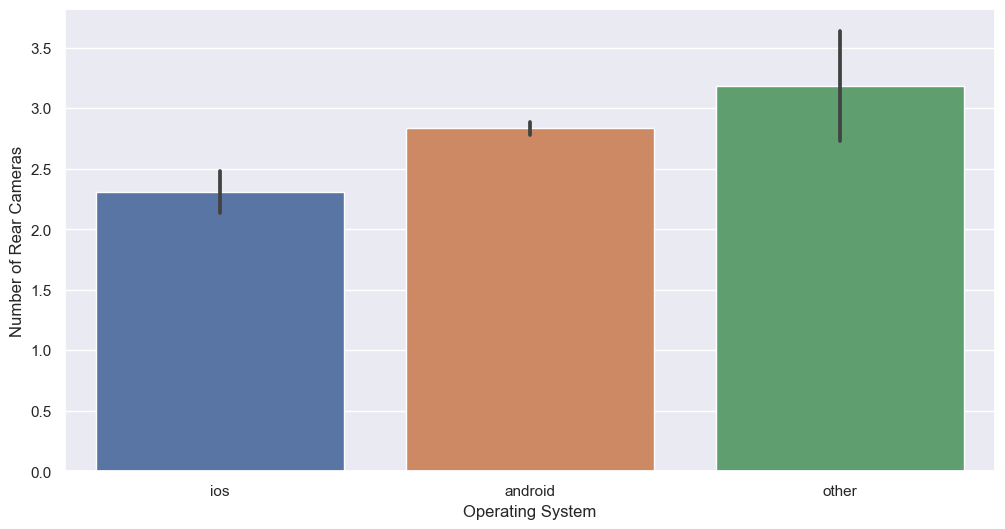

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x='os', y='num_rear_cameras', data=df)
plt.xlabel('Operating System')
plt.ylabel('Number of Rear Cameras')
plt.show()

# 19. Is there a relationship between the average rating and the price of smartphones?

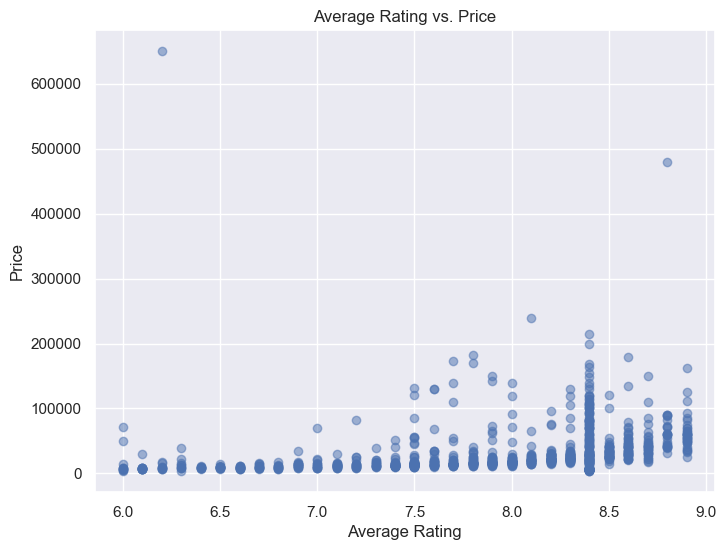

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(df['avg_rating'], df['price'], alpha=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Price')
plt.title('Average Rating vs. Price')
plt.show()

# 20. How does the processor speed vary among different smartphone brands?

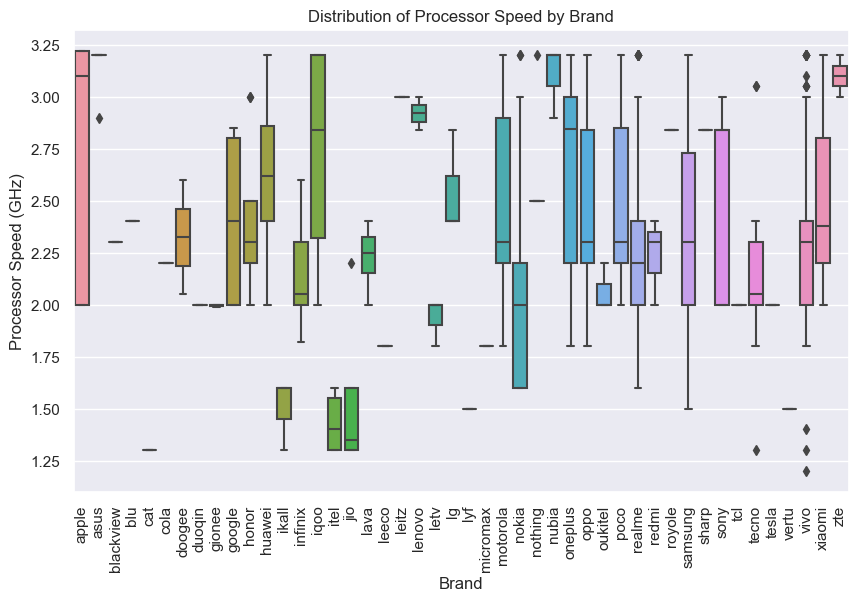

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand_name', y='processor_speed', data=df)
plt.xlabel('Brand')
plt.ylabel('Processor Speed (GHz)')
plt.xticks(rotation=90)
plt.title('Distribution of Processor Speed by Brand')
plt.show()